In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
#Load in the data
df = pd.read_csv('iris_data.csv')
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,4.3,3.0,1.1,0.1,I.�setosa
1,4.4,2.9,1.4,0.2,I.�setosa
2,4.4,3.0,1.3,0.2,I.�setosa
3,4.4,3.2,1.3,0.2,I.�setosa
4,4.5,2.3,1.3,0.3,I.�setosa


In [3]:
df.iloc[:,:-1]

,Sepal length,Sepal width,Petal length,Petal width
0,4.3,3.0,1.1,0.1
1,4.4,2.9,1.4,0.2
2,4.4,3.0,1.3,0.2
3,4.4,3.2,1.3,0.2
4,4.5,2.3,1.3,0.3
...,...,...,...,...
145,7.7,3.8,6.7,2.2
146,7.7,2.6,6.9,2.3
147,7.7,2.8,6.7,2.0
148,7.7,3.0,6.1,2.3


In [4]:
#put features in X and labels in target
X = df.iloc[:,:-1]

target = df['Species']

In [5]:
X.shape

(150, 4)

In [6]:
target.shape

(150,)

In [7]:
#target classes are three
target.unique()

array(['I.�setosa', 'I.�versicolor', 'I.�virginica'], dtype=object)

In [8]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.3,random_state=0) 

In [9]:
X_train.shape

(105, 4)

In [10]:
X_test.shape

(45, 4)

In [11]:
#join the data with the labels
df = X.join(pd.Series(target, name='class'))
df.head()

,Sepal length,Sepal width,Petal length,Petal width,class
0,4.3,3.0,1.1,0.1,I.�setosa
1,4.4,2.9,1.4,0.2,I.�setosa
2,4.4,3.0,1.3,0.2,I.�setosa
3,4.4,3.2,1.3,0.2,I.�setosa
4,4.5,2.3,1.3,0.3,I.�setosa


In [12]:
#calculates mean per feature of classes
class_feature_means = pd.DataFrame(columns=target.unique())
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means

,I.�setosa,I.�versicolor,I.�virginica
Sepal length,5.006,5.936,6.588
Sepal width,3.428,2.770,2.974
Petal length,1.462,4.260,5.552
Petal width,0.244,1.326,2.026


In [13]:
#Compute the Scatter within matrices
within_class_scatter_matrix = np.zeros((4,4))

for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)

    
    s = np.zeros((4,4))
for index, row in rows.iterrows():
    print(row.values)
    x, mc = row.values.reshape(4,1), class_feature_means[c].values.reshape(4,1)
        
    s += (x - mc).dot((x - mc).T)

within_class_scatter_matrix += s

[4.9 2.5 4.5 1.7]
[5.6 2.8 4.9 2. ]
[5.7 2.5 5.  2. ]
[5.8 2.7 5.1 1.9]
[5.8 2.8 5.1 2.4]
[5.8 2.7 5.1 1.9]
[5.9 3.  5.1 1.8]
[6.  2.2 5.  1.5]
[6.  3.  4.8 1.8]
[6.1 3.  4.9 1.8]
[6.1 2.6 5.6 1.4]
[6.2 2.8 4.8 1.8]
[6.2 3.4 5.4 2.3]
[6.3 3.3 6.  2.5]
[6.3 2.9 5.6 1.8]
[6.3 2.7 4.9 1.8]
[6.3 2.8 5.1 1.5]
[6.3 3.4 5.6 2.4]
[6.3 2.5 5.  1.9]
[6.4 2.7 5.3 1.9]
[6.4 3.2 5.3 2.3]
[6.4 2.8 5.6 2.1]
[6.4 2.8 5.6 2.2]
[6.4 3.1 5.5 1.8]
[6.5 3.  5.8 2.2]
[6.5 3.2 5.1 2. ]
[6.5 3.  5.5 1.8]
[6.5 3.  5.2 2. ]
[6.7 2.5 5.8 1.8]
[6.7 3.3 5.7 2.1]
[6.7 3.1 5.6 2.4]
[6.7 3.3 5.7 2.5]
[6.7 3.  5.2 2.3]
[6.8 3.  5.5 2.1]
[6.8 3.2 5.9 2.3]
[6.9 3.2 5.7 2.3]
[6.9 3.1 5.4 2.1]
[6.9 3.1 5.1 2.3]
[7.1 3.  5.9 2.1]
[7.2 3.6 6.1 2.5]
[7.2 3.2 6.  1.8]
[7.2 3.  5.8 1.6]
[7.3 2.9 6.3 1.8]
[7.4 2.8 6.1 1.9]
[7.6 3.  6.6 2.1]
[7.7 3.8 6.7 2.2]
[7.7 2.6 6.9 2.3]
[7.7 2.8 6.7 2. ]
[7.7 3.  6.1 2.3]
[7.9 3.8 6.4 2. ]


In [14]:
#Compute the Scatter between matrices

feature_means = df.mean()
between_class_scatter_matrix = np.zeros((4,4))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(4,1), feature_means.values.reshape(4,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)


In [15]:
#Compute the Eigenvalues and Eigenvectors of SW^-1 SB
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [16]:
#Select the two largest eigenvalues 
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

92.06674738270223
0.7199123185670363
1.5624986754300858e-14
4.754324443243861e-15


In [17]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))


Explained Variance
Eigenvector 0: 0.9922412088021614
Eigenvector 1: 0.0077587911978384124
Eigenvector 2: 1.683969096916107e-16
Eigenvector 3: 5.123931024729866e-17


In [18]:
w_matrix = np.hstack((pairs[0][1].reshape(4,1), pairs[1][1].reshape(4,1))).real

In [19]:
w_matrix

array([[-0.3571, -0.0647],
       [-0.4471,  0.9117],
       [ 0.6204, -0.0248],
       [ 0.5364,  0.4051]])

In [20]:
X_lda = np.array(X.dot(w_matrix))

In [21]:
X_lda[0]

array([-2.1406,  2.4701])

In [22]:
X_lda[1]

array([-1.8919,  2.4055])

In [23]:
le = LabelEncoder()
y = le.fit_transform(df['class'])

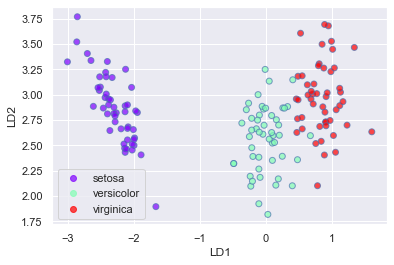

In [24]:
plt.xlabel('LD1')
plt.ylabel('LD2')

scatter=plt.scatter(
    x=X_lda[:,0],
    y=X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.legend(handles=scatter.legend_elements()[0], labels=['setosa', 'versicolor', 'virginica'])


In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [26]:
lda.explained_variance_ratio_

array([0.9912, 0.0088])

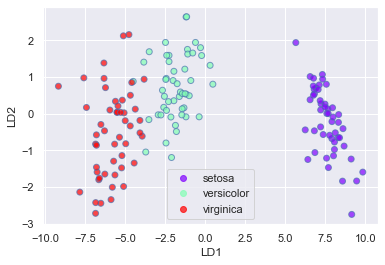

In [27]:
plt.xlabel('LD1')
plt.ylabel('LD2')
scatter=plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.legend(handles=scatter.legend_elements()[0], labels=['setosa', 'versicolor', 'virginica'])


In [28]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

In [29]:
pca.explained_variance_ratio_

array([0.9246, 0.0531])

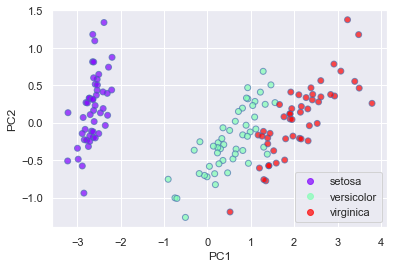

In [30]:
plt.xlabel('PC1')
plt.ylabel('PC2')
scatter =plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.legend(handles=scatter.legend_elements()[0], labels=['setosa', 'versicolor', 'virginica'])


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[13,  0,  0],
       [ 0, 14,  2],
       [ 0,  0,  9]], dtype=int64)